In [4]:
import torch as th

embed_dim = 512
num_heads = 8
B = 10
L_target = 100
L_source = 30
query = th.rand(B, L_target, embed_dim)  # (N, L, E) where N is batch size, L is target sequence length, E is embedding dimension
key = th.rand(B, L_source, embed_dim)    # (N, S, E) where S is source sequence length
value = th.rand(B, L_source, embed_dim)  # (N, S, E)

multihead_attn = th.nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
attn_output, attn_output_weights = multihead_attn(query, key, value)
print(attn_output.shape)  # should be (B, L_target, embed_dim)
print(attn_output_weights.shape)  # should be (B, L_target, L_source)

torch.Size([10, 100, 512])
torch.Size([10, 100, 30])


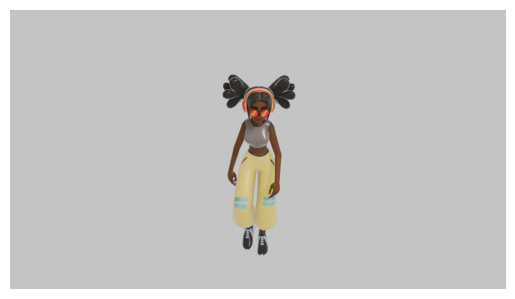

In [ ]:
data = "/data/mint/Motion_Dataset/Mixamo/output_mixamo_720p/Walking/cam_0/frame0000.png"
from PIL import Image
image = Image.open(data)
print(np.array(image).shape)
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()
